# Hyperparameters

[  0  61  44 126   9  43  84  33  82  94  65  25  69 195  40  68  57  39
 110  58  47  78 246  55 222  34  48  80  31  52  68  59 177 149  59  37
 119 263 200  89  37  81  44  63  46  81  60 154  68 158  37  71  62  93
  65  74  96  66  63 138 156]
[ 0 19  9 23  2 11 19  7 26 47 14  7 14 55 10 14 13 10 33 13 13 15 77 17
 63  7  9 19  7 12 14 14 53 42 13 13 33 82 57 64 14 24 12 15 10 19 20 44
 22 45 22 15 13 20 15 16 28 15 14 37 25]
[ 0 13  5 16  1 14 10  3 12 30  8  3  7 36  5  8  7  5 16  7  8  8 50 10
 58  4  6 10  3  6  8  7 36 30  7  6 20 55 37 47  9 19 24  7  6 10 12 29
 15 29  3  8  7 18  8  8 17 22  7 24 26]
[ 0  6  3 11  1  5  6  5  7 21  4  2  4 28  3  4  4  3 11  4  5  5 21  8
 22  2  3  6  2  7  4  4 26 17  4  8 11 40 31 24  6  9  6  4  3  5  7 20
  6 18  2  4  4  8  5  4 11  4  4 14 13]
[ 0  5  2  3  1  2  4  3  5 17  3  1  3 16  2  3  3  2  9  3  3  6 14  5
 15  1  2  4  2  5  3  3 26 13  3  5 11 26 32 13  5  5  6  3  2  5 12 16
  3 17  1  3  3  6  3  3  7  5  3 14  8]
[ 0

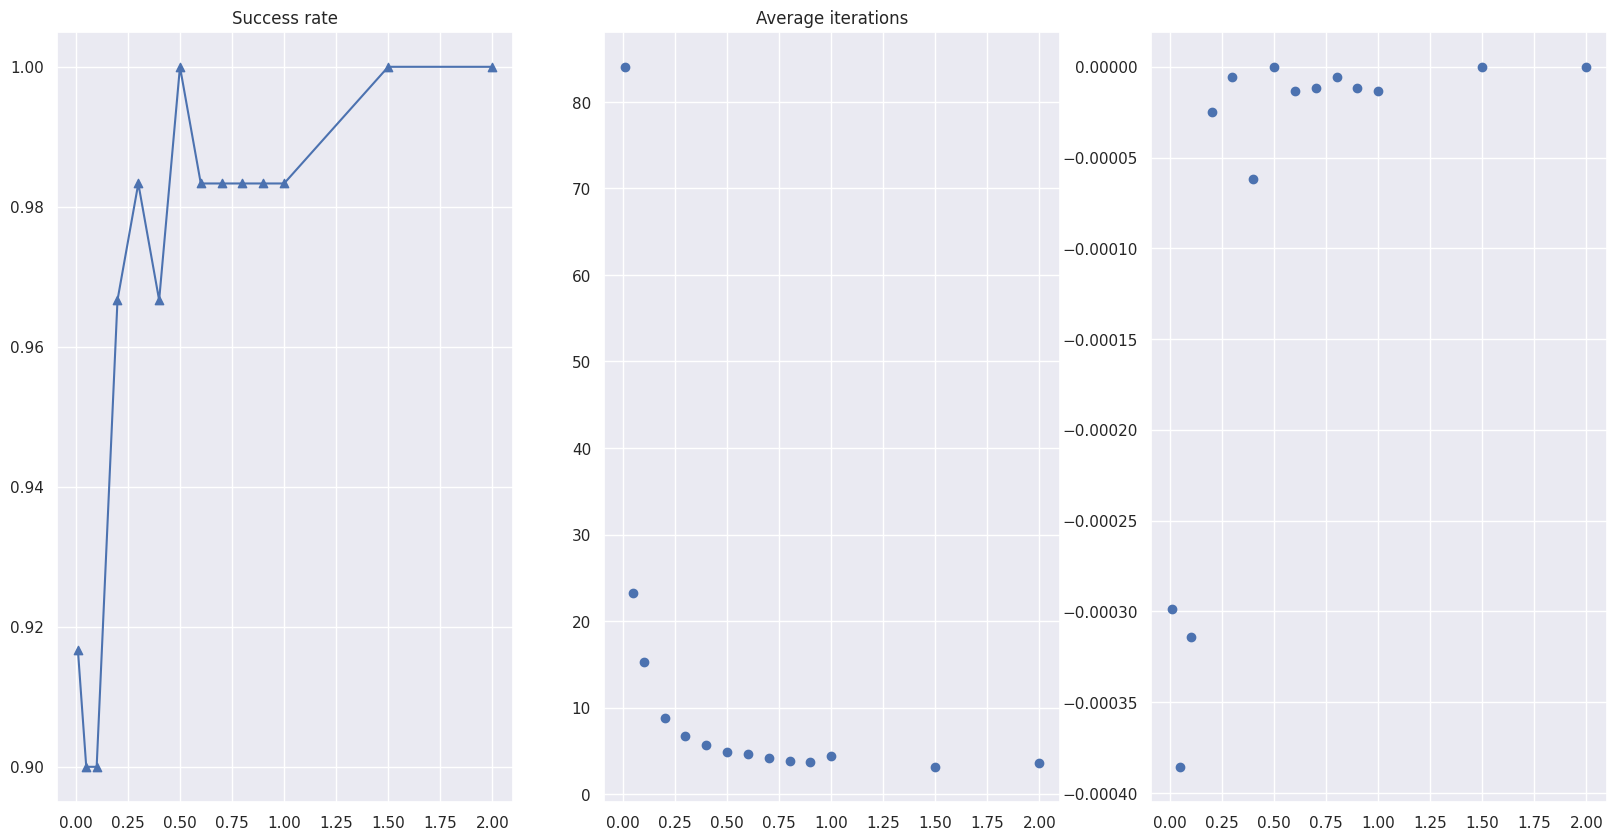

In [9]:

import seaborn as sns
from matplotlib import pyplot as plt 
import pandas as pd 
import numpy as np

size = 10

sns.set_theme(style = 'darkgrid')
fig,axs = plt.subplots (nrows = 1, ncols = 3, figsize = (20, 10))

sr_plot = axs[0]
its_plot = axs[1] 
approx_plot = axs[2]

stepsizes = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0]

success_rates = []
average_its = [] 
approx_ratios = []

ansatz = 'CIA'

for stepsize in stepsizes:
    
    trainset = pd.read_csv(f'data/train_{ansatz}/Training_size_{size}_stepsize_{stepsize}.csv')


    sr = (len(trainset[trainset['Train (flt)'] == trainset['Test (flt)']]) -1 ) / (len(trainset) - 1)
    
    its_1 = np.array(trainset['Train_iterations_1 (int)'])
    its_2 = np.array(trainset['Train_iterations_2 (int)'])
    its_3 = np.array(trainset['Train_iterations_3 (int)'])
    barens = np.array(trainset['Baren (int)'])

    print(np.maximum(np.maximum(np.maximum(its_1, its_2), its_3), barens))
    iterations = np.mean(np.maximum(np.maximum(np.maximum(its_1, its_2), its_3), barens))
    success_rates.append(sr)
    average_its.append(iterations)

    approx = np.mean((trainset['Train (flt)'] - trainset['Test (flt)']) / trainset['Test (flt)'])
    approx_ratios.append(approx)
sr_plot.scatter(stepsizes, success_rates, marker = '^')
sr_plot.plot(stepsizes, success_rates)
sr_plot.set_title('Success rate')

its_plot.scatter(stepsizes, average_its)
its_plot.set_title('Average iterations')

approx_plot.scatter(stepsizes, approx_ratios)

# delete zeor line !!!!!!!!!!!!!
plt.show()

In [38]:
import numpy as np

a = np.array([1,2,3])
b = np.array([3,2,1])

print(np.maximum(a,b))

[3 2 3]
